### 이미지 다운로드

In [9]:
!pwd

/content


In [10]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-07-04 14:09:56--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.04s   

2021-07-04 14:09:56 (8.85 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



In [40]:
import cv2
import matplotlib.pyplot as plt
import time 

%matplotlib inline

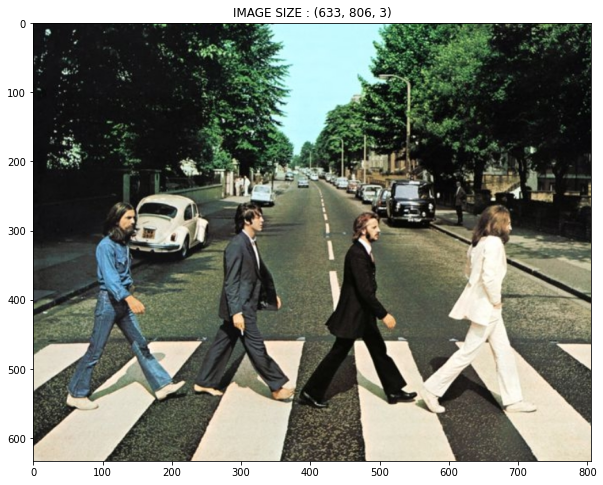

In [12]:
img = cv2.imread('/content/data/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,10))
plt.title("IMAGE SIZE : {}".format(img_rgb.shape))
plt.imshow(img_rgb)
plt.show()

### Tensorflow에서 Pretrained 된 inference모델과 config파일을 다운 받음

In [1]:
!mkdir ./pretrained

!wget -O ./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget -O ./pretrained/config_graph.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

--2021-07-04 14:08:20--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.204.128, 2404:6800:4008:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.204.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

./pretrained/faster 100%[===================>] 363.69M  88.2MB/s    in 4.5s    

2021-07-04 14:08:26 (81.2 MB/s) - ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]

--2021-07-04 14:08:26--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.gi

In [2]:
!tar -xvf /content/pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz -C ./pretrained

faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb


In [4]:
!pwd
!ls -lia ./pretrained/faster_rcnn_resnet50_coco_2018_01_28 # -lia는 정보를 알려줌

/content
total 296076
3277007 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 .
3277003 drwxr-xr-x 3 root   root      4096 Jul  4 14:08 ..
3277009 -rw-r--r-- 1 345018 5000        77 Feb  1  2018 checkpoint
3277040 -rw-r--r-- 1 345018 5000 120549957 Feb  1  2018 frozen_inference_graph.pb
3277011 -rw-r--r-- 1 345018 5000 176914228 Feb  1  2018 model.ckpt.data-00000-of-00001
3277008 -rw-r--r-- 1 345018 5000     14460 Feb  1  2018 model.ckpt.index
3277012 -rw-r--r-- 1 345018 5000   5675175 Feb  1  2018 model.ckpt.meta
3277010 -rw-r--r-- 1 345018 5000      3240 Feb  1  2018 pipeline.config
3277037 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 saved_model


In [7]:
cv_net = cv2.dnn.readNetFromTensorflow('/content/pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb',
                                       '/content/pretrained/config_graph.pbtxt')


In [8]:
# OpenCV Yolo용 
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }
                        

# OpenCV Tensorflow Faster-RCNN용
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}


labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [13]:
img.shape

(633, 806, 3)

In [29]:
# 원본 이미지가 Faster RCNN네트웍에 입력되면 resize 됨
# scaling된 이미지 기반으로 boounding box 값이 출력되기에 원본 shape모형을 곱해줘서 복원 시켜야함
rows = img.shape[0]
cols = img.shape[1]

img_copy = img.copy()

# 전처리해주는 함수
cv_net.setInput(cv2.dnn.blobFromImage(img, swapRB=True, crop=False))

cv_out = cv_net.forward()
print(cv_out.shape)

(1, 1, 100, 7)


In [30]:
cv_out[:,:,:5]
# 아무 값 아님 / class 값 / class일 확률 / x1 / y1 / x2 / y2

array([[[[0.        , 0.        , 0.9997807 , 0.28024828, 0.41107035,
          0.46606207, 0.8598299 ],
         [0.        , 0.        , 0.9995882 , 0.05829126, 0.41346604,
          0.26121253, 0.8937015 ],
         [0.        , 0.        , 0.9992593 , 0.68943185, 0.41028193,
          0.8997528 , 0.92437565],
         [0.        , 0.        , 0.9969887 , 0.47825542, 0.43930298,
          0.69274855, 0.88473815],
         [0.        , 0.        , 0.89945173, 0.7595002 , 0.36539236,
          0.786593  , 0.46582612]]]], dtype=float32)

person : 0.9998
person : 0.9996
person : 0.9993
person : 0.9970
person : 0.8995
car : 0.8922
car : 0.7602
car : 0.7415
car : 0.6930
car : 0.6918
car : 0.6896
car : 0.6717
car : 0.6521
car : 0.5730
car : 0.5679
car : 0.5261
car : 0.5012


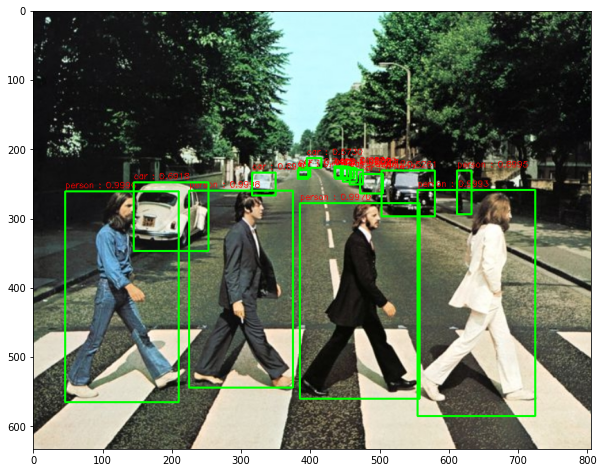

In [33]:
green_color = (0, 255, 0)
red_color = (0, 0, 255)

for detection in cv_out[0,0,:,:]:
  score = float(detection[2])
  class_id = int(detection[1])

  if score > 0.5:
    x1 = int(detection[3] * cols)
    y1 = int(detection[4] * rows)
    x2 = int(detection[5] * cols)
    y2 = int(detection[6] * rows)

    text = "{} : {:.4f}".format(labels_to_names_0[class_id], score)
    print(text)

    cv2.rectangle(img_copy, (x1,y1), (x2,y2), color=green_color, thickness=2)
    cv2.putText(img_copy, text, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)


img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)

In [38]:
def get_detected_img(cv_net, img_array, score_threshold, use_copied_array=True, is_print=True):
  
  green_color = (0, 255, 0)
  red_color = (0, 0, 255)
  
  rows = img.shape[0]
  cols = img.shape[1]

  draw_img = None
  if use_copied_array:
    draw_img = img_array.copy()
  else:
    draw_img = img_array


  cv_net.setInput(cv2.dnn.blobFromImage(img_array, swapRB=True, crop=False))
  start = time.time()
  cv_out = cv_net.forward()


  for detection in cv_out[0,0,:,:]:
    score = float(detection[2])
    class_id = int(detection[1])

    if score > score_threshold:
      x1 = int(detection[3] * cols)
      y1 = int(detection[4] * rows)
      x2 = int(detection[5] * cols)
      y2 = int(detection[6] * rows)

      text = "{} : {:.4f}".format(labels_to_names_0[class_id], score)
      print(text)

      cv2.rectangle(draw_img, (x1,y1), (x2,y2), color=green_color, thickness=2)
      cv2.putText(draw_img, text, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)
  
  if is_print:
    print("Detection 수행시간 : {}초".format(round(time.time() - start,2)))
  
  return draw_img

image shape: (633, 806, 3)
person : 0.9998
person : 0.9996
person : 0.9993
person : 0.9970
person : 0.8995
car : 0.8922
car : 0.7602
car : 0.7415
car : 0.6930
car : 0.6918
car : 0.6896
car : 0.6717
car : 0.6521
car : 0.5730
car : 0.5679
car : 0.5261
car : 0.5012
Detection 수행시간 : 8.83초


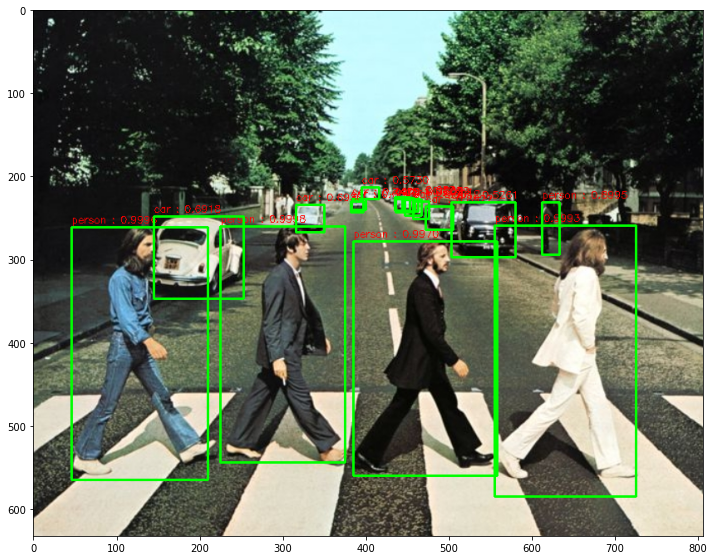

In [41]:
# image 로드 
img = cv2.imread('./data/beatles01.jpg')
print('image shape:', img.shape)

# tensorflow inference 모델 로딩
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_graph.pbtxt')
# Object Detetion 수행 후 시각화 
draw_img = get_detected_img(cv_net, img, score_threshold=0.5, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

In [42]:
# 다른 image 테스트
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

--2021-07-04 14:34:49--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76279 (74K) [image/jpeg]
Saving to: ‘./data/baseball01.jpg’

./data/baseball01.j 100%[===================>]  74.49K  --.-KB/s    in 0.02s   

2021-07-04 14:34:49 (4.41 MB/s) - ‘./data/baseball01.jpg’ saved [76279/76279]



image shape: (476, 735, 3)
person : 0.9998
person : 0.9997
person : 0.9977
sports ball : 0.8867
baseball bat : 0.8420
baseball glove : 0.9815
Detection 수행시간 : 7.84초


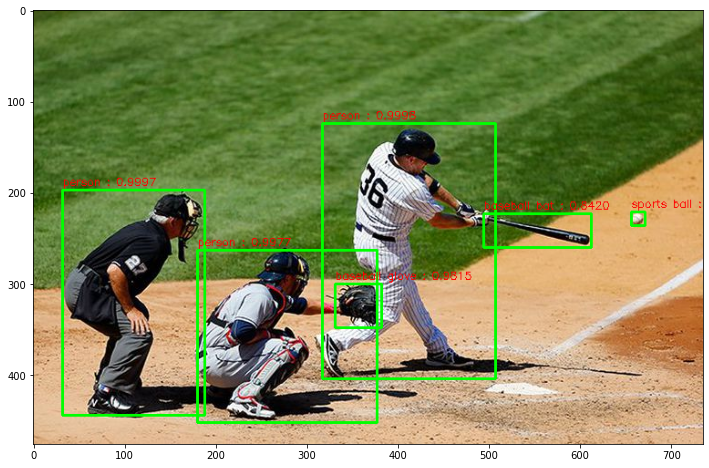

In [43]:
img = cv2.imread('./data/baseball01.jpg')
print('image shape:', img.shape)

# tensorflow inference 모델 로딩
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_graph.pbtxt')
# Object Detetion 수행 후 시각화 
draw_img = get_detected_img(cv_net, img, score_threshold=0.5, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)